In [3]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [4]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [5]:
all_positive_tweets=twitter_samples.strings('positive_tweets.json')
all_negative_tweets=twitter_samples.strings('negative_tweets.json')

In [7]:
print('Number of positive tweets: ',len(all_positive_tweets))
print('Number of negative tweets: ',len(all_negative_tweets))

print('\nThe type of all_positive tweets is: ',type(all_positive_tweets))
print('The type of a tweets is: ',type(all_positive_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive tweets is:  <class 'list'>
The type of a tweets is:  <class 'str'>


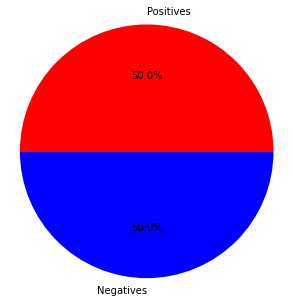

In [104]:
fig=plt.figure(figsize=(5,5))
labels='Positives Negatives'.split()
sizes=[len(all_positive_tweets),len(all_negative_tweets)]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',colors=['red','blue'])
plt.axis('equal');

In [17]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

@RamblinManFair @DannyBryant we've come over from Belfast to see Danny at this festival! Cant wait! :)


In [24]:
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

All guys want from me is dick pics and all I want is to have a meaningful conversation about things we have in common :(((


In [25]:
#preprocessing data

In [26]:
tweet=all_positive_tweets[2277]

In [27]:
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piotrek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [32]:
print('\033[93m'+tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [35]:
tweet2=re.sub(r'^RT[\s]+','',tweet)

In [36]:
tweet2

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [85]:
#removing hyperlinks

In [45]:
tweet2=re.sub(r'https?:\/\/.*[\r\n]*','',tweet2)

In [46]:
tweet2

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… '

In [86]:
#removing hashtags

In [87]:
tweet2=re.sub(r'#','',tweet2)

In [88]:
tweet2

'My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… '

In [89]:
#tokenizing the string

In [90]:
tokenizer=TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)

In [91]:
tweet_tokens=tokenizer.tokenize(tweet2)

In [95]:
print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [96]:
#removing stopwords and punctuation

In [97]:
stopwords_english=stopwords.words('english')

In [98]:
print('Stop words\n')
print(stopwords_english)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [100]:
print('\nPunctuation\n')
print(string.punctuation)


Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [102]:
tweets_clean=[word for word in tweet_tokens if word not in stopwords_english and word not in string.punctuation]

In [105]:
#stemming

In [106]:
stemmer=PorterStemmer()

In [107]:
tweets_stem=[stemmer.stem(word) for word in tweets_clean]

In [108]:
tweets_stem

['beauti',
 'sunflow',
 'sunni',
 'friday',
 'morn',
 ':)',
 'sunflow',
 'favourit',
 'happi',
 'friday',
 '…']